# Aula 2 - Imersão Dados 4 Alura

## Códigos feitos em aula

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [4]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True) #adiciona as colunas das strings separadas no dataframe
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [5]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()] #cria um novo dataframe sem os imoveis que não estão a venda
dados_vendas["Valor_anuncio"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)
dados_vendas

C:\Users\belap\AppData\Local\Temp\ipykernel_6196\1176310471.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_anuncio"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)
C:\Users\belap\AppData\Local\Temp\ipykernel_6196\1176310471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_anuncio"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.0,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.0,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.0,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.0,None


### Outra forma de fazer o Desafio 3 da Aula 2

In [6]:
soma_valores_bairro = dados_vendas.groupby("Bairro")["Valor_anuncio"].sum()
soma_metragem_bairro = dados_vendas.groupby("Bairro")["Metragem"].sum()

valor_m2_bairro = pd.DataFrame(soma_valores_bairro/soma_metragem_bairro)
valor_m2_bairro.reset_index(inplace=True)
valor_m2_bairro.rename(columns={0: 'Valor_m2'}, inplace=True)
valor_m2_bairro

,Bairro,Valor_m2
0,Aclimação,7162.688384
1,Alto da Boa Vista,5708.743659
2,Alto da Lapa,6961.299081
3,Alto da Mooca,4385.002777
4,Alto de Pinheiros,11126.342330
...,...,...
692,Vila Água Funda,4283.837057
693,Água Branca,7065.770523
694,Água Fria,5604.534005
695,Água Funda,3920.863309


In [7]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index
top_bairros

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

In [8]:
valor_m2_bairro.query("Bairro in @top_bairros")

,Bairro,Valor_m2
4,Alto de Pinheiros,11126.342330
19,Brooklin Paulista,6796.902788
57,Cidade Jardim,8805.104372
155,Jardim Europa,20304.571145
168,Jardim Guedala,1852.646940
187,Jardim Leonor,6653.486880
227,Jardim Paulista,16395.700130
338,Pacaembu,8654.898539
396,Planalto Paulista,6327.544304
564,Vila Madalena,8803.819321


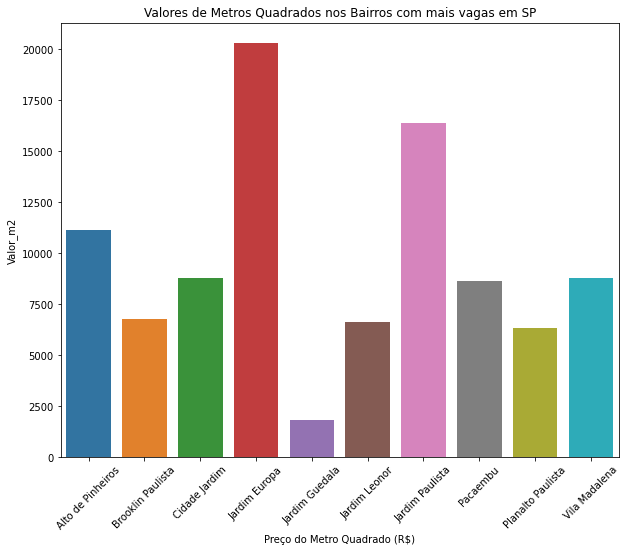

In [15]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(data=valor_m2_bairro.query("Bairro in @top_bairros"), x ="Bairro", y="Valor_m2")
ax.set_xlabel("Preço do Metro Quadrado (R$)")
ax.set_title("Valores de Metros Quadrados nos Bairros com mais vagas em SP")
ax.tick_params(axis='x', rotation = 45)
plt.show()

### Outros gráficos

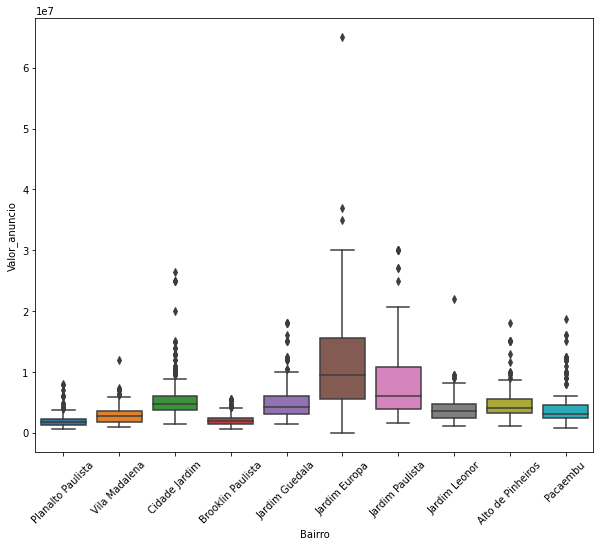

In [14]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Valor_anuncio")
ax.tick_params(axis='x', rotation = 45)
plt.show()

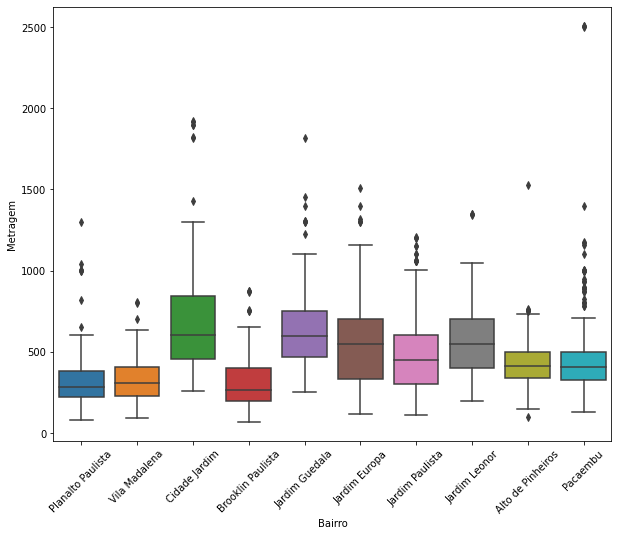

In [18]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation = 45)
plt.show()

In [32]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
ibge = pd.read_csv(ibge_url, encoding = 'UTF-8', sep = ';', decimal=',')

## Desafios:

1 - Tentar vincular dados do IBGE com os dados de imóveis.

2 - Tratar os outliers e comparar com os resultados.

3 - Agrupar por mais de uma categoria e realizar as análises.

4 - Organize o colab para deixar com cara de projeto.

In [33]:
ibge

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86,NaN
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94,NaN
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74,NaN
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24,NaN
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,355030896000243,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.61,772.09,168751.10,814.52,143188.21,467.46,191332.48,699.95,123399.08,NaN
18359,355030896000244,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.49,692.50,239941.27,812.93,182516.20,439.33,194034.99,702.10,124952.38,NaN
18360,355030896000245,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.54,630.06,329705.22,843.31,260395.90,347.60,228162.66,767.50,181129.99,NaN
18361,355030896000246,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,4.21,597.37,349101.00,908.00,244391.67,397.76,436942.16,854.20,550319.43,NaN


In [26]:
ibge[2].str.split(pat = ";", expand = True)

KeyError: 2